In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, f1_score, roc_curve 
from sklearn.metrics import auc, recall_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.preprocessing import StandardScaler

In [2]:
#Load Dataframe
df = pd.read_csv("Heart Failure Prediction/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
#Check Numeric Columns

numeric_cols = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include = numeric_cols)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [4]:
#Check Categorical Columns

df.select_dtypes(include = 'object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [5]:
#Check for NAs

df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

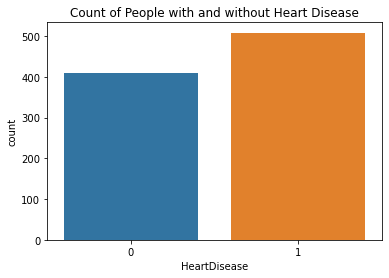

In [6]:
#Check Class Balance of Y Variable

sns.countplot(x = 'HeartDisease', data = df)
plt.title('Count of People with and without Heart Disease')
plt.show()

Below visualizations check the distribution of continuous variables for 1 and 0 class of target variable

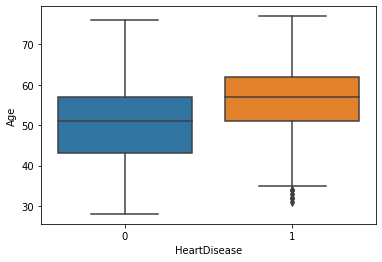

In [7]:
#Impact of Age on Heart Disease

sns.boxplot(x = 'HeartDisease', y = 'Age', data = df)
plt.show()

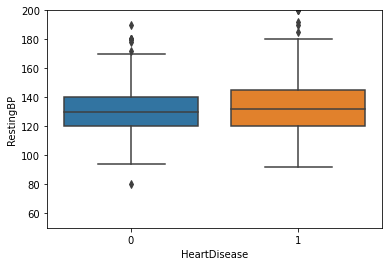

In [8]:
#Impact of RestingBP on Heart Disease

sns.boxplot(x = 'HeartDisease', y = 'RestingBP', data = df)
plt.ylim((50,200))
plt.show()

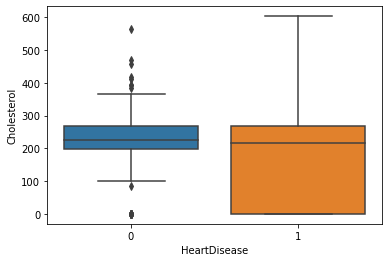

In [9]:
#Impact of Cholesterol on Heart Disease

sns.boxplot(x = 'HeartDisease', y = 'Cholesterol', data = df)
plt.show()

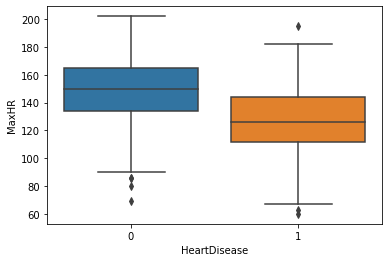

In [10]:
#Impact of MaxHR on Heart Disease

sns.boxplot(x = 'HeartDisease', y = 'MaxHR', data = df)
plt.show()

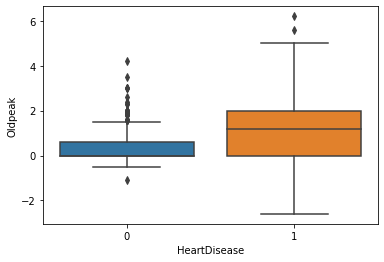

In [11]:
#Impact of Oldpeak on Heart Disease

sns.boxplot(x = 'HeartDisease', y = 'Oldpeak', data = df)
plt.show()

The below Cells check the distribution of Categorical Variables for each class of target variable

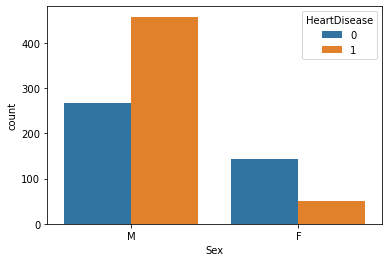

In [12]:
sns.countplot(x = 'Sex', hue = 'HeartDisease', data = df)
plt.show()

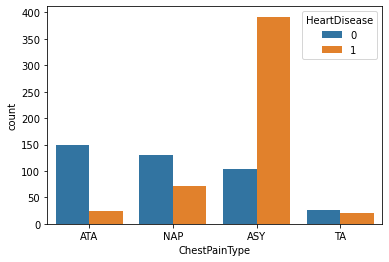

In [13]:
sns.countplot(x='ChestPainType', hue = 'HeartDisease', data = df)
plt.show()

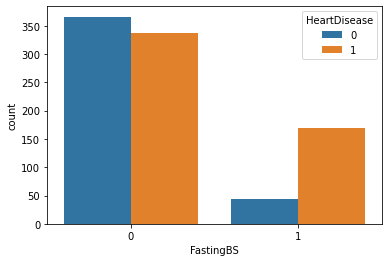

In [14]:
sns.countplot(x='FastingBS', hue = 'HeartDisease', data = df)
plt.show()

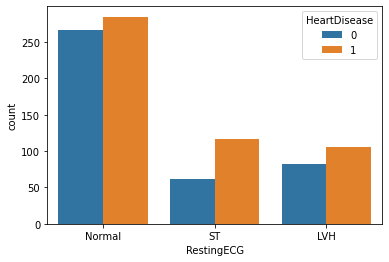

In [15]:
sns.countplot(x='RestingECG', hue = 'HeartDisease', data = df)
plt.show()

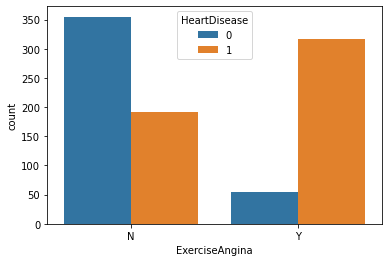

In [16]:
sns.countplot(x='ExerciseAngina', hue = 'HeartDisease', data = df)
plt.show()

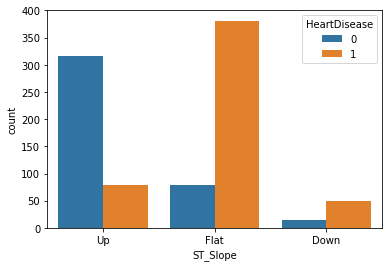

In [17]:
sns.countplot(x='ST_Slope', hue = 'HeartDisease', data = df)
plt.show()

## Training and Testing the Model

In [18]:
df = pd.get_dummies(df, columns = list(df.select_dtypes(include = 'object').columns), drop_first=True)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


[]

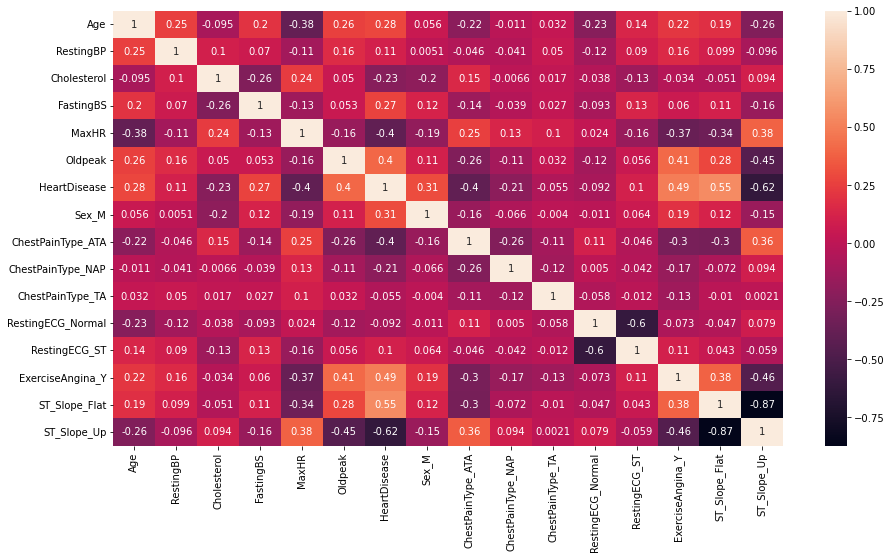

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.plot()

In [20]:
x_df = df.drop('HeartDisease', axis = 1)
y_df = df['HeartDisease']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, stratify=y_df,random_state = 1)

In [22]:
#Scale Numeric Features, which is required for linear models

columns = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

x_train_scaled = x_train.copy()
x_train_scaled[columns] = StandardScaler().fit_transform(x_train_scaled[columns])

In [23]:
#Check if scaled columns have mean = 0 and Standard Deviation = 1
x_train_scaled.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,7.340000e+02,7.340000e+02,7.340000e+02,734.000000,7.340000e+02,7.340000e+02,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,-2.657577e-16,-3.562092e-16,-2.843623e-17,0.228883,-9.714451e-17,1.374922e-16,0.795640,0.201635,0.217984,0.049046,0.596730,0.204360,0.395095,0.505450,0.433243
std,1.000682e+00,1.000682e+00,1.000682e+00,0.420400,1.000682e+00,1.000682e+00,0.403508,0.401495,0.413158,0.216112,0.490889,0.403508,0.489205,0.500311,0.495861
min,-2.767990e+00,-7.069929e+00,-1.788762e+00,0.000000,-3.020697e+00,-2.721906e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.979451e-01,-6.551018e-01,-2.390189e-01,0.000000,-6.697357e-01,-8.286306e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.306855e-02,-1.205329e-01,2.247726e-01,0.000000,3.555269e-02,-3.553116e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,7.040821e-01,4.140360e-01,6.274795e-01,0.000000,7.408411e-01,5.913263e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,2.548621e+00,3.621450e+00,3.668142e+00,1.000000,2.543245e+00,5.040525e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
#Define a function to calculate Model Metrics

def calc_metrics(test_y, predicted_y):
    print('Accuracy: ', accuracy_score(test_y, predicted_y))
    print('Precision: ', precision_score(test_y, predicted_y))
    print('Recall: ', recall_score(test_y, predicted_y))
    print('F1-Score: ', f1_score(test_y, predicted_y))
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    print('Specificity: ', tn / (tn+fp))
    print('Sensitivity: ', recall_score(test_y, predicted_y))
    print('Confusion Matrix: ',confusion_matrix(y_test, y_pred))

In [25]:
#1 Logistic Regression

model_logit = LogisticRegression(max_iter=100000, random_state=1)

model_logit.fit(x_train_scaled, y_train)
y_pred = model_logit.predict(x_test)

calc_metrics(y_test,y_pred)

Accuracy:  0.44565217391304346
Precision:  0.0
Recall:  0.0
F1-Score:  0.0
Specificity:  1.0
Sensitivity:  0.0
Confusion Matrix:  [[ 82   0]
 [102   0]]


C:\Users\madhu.DESKTOP-TSSCKJJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#2 KNN Classifier

model_KNN = KNeighborsClassifier()

model_KNN.fit(x_train_scaled, y_train)
y_pred = model_KNN.predict(x_test)

calc_metrics(y_test,y_pred)

Accuracy:  0.6304347826086957
Precision:  0.7741935483870968
Recall:  0.47058823529411764
F1-Score:  0.5853658536585367
Specificity:  0.8292682926829268
Sensitivity:  0.47058823529411764
Confusion Matrix:  [[68 14]
 [54 48]]


In [27]:
#Random Forest

model_rf = RandomForestClassifier(n_estimators=50, 
                            criterion='entropy', min_samples_split=5, 
                            min_samples_leaf=6, max_features='auto', 
                            random_state=50)

model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)

calc_metrics(y_test,y_pred)

Accuracy:  0.8478260869565217
Precision:  0.8303571428571429
Recall:  0.9117647058823529
F1-Score:  0.8691588785046729
Specificity:  0.7682926829268293
Sensitivity:  0.9117647058823529
Confusion Matrix:  [[63 19]
 [ 9 93]]


In [28]:
#Decision Tree

model_DT = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=5, 
                                 min_samples_leaf=6, max_features='auto', 
                                 random_state=50)

model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)

calc_metrics(y_test,y_pred)

Accuracy:  0.8315217391304348
Precision:  0.8380952380952381
Recall:  0.8627450980392157
F1-Score:  0.8502415458937198
Specificity:  0.7926829268292683
Sensitivity:  0.8627450980392157
Confusion Matrix:  [[65 17]
 [14 88]]


In [29]:
#XGBoost Classifier

model_XGB = XGBClassifier()

model_XGB.fit(x_train, y_train)
y_pred = model_XGB.predict(x_test)

calc_metrics(y_test,y_pred)

C:\Users\madhu.DESKTOP-TSSCKJJ\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.8532608695652174
Precision:  0.8571428571428571
Recall:  0.8823529411764706
F1-Score:  0.8695652173913043
Specificity:  0.8170731707317073
Sensitivity:  0.8823529411764706
Confusion Matrix:  [[67 15]
 [12 90]]


## Select Best Model and Get Feature Parameters

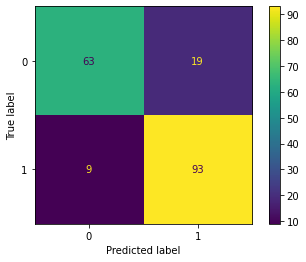

In [30]:
#Random Forest has the best result, hence will be selected

plot_confusion_matrix(model_rf, x_test, y_test)

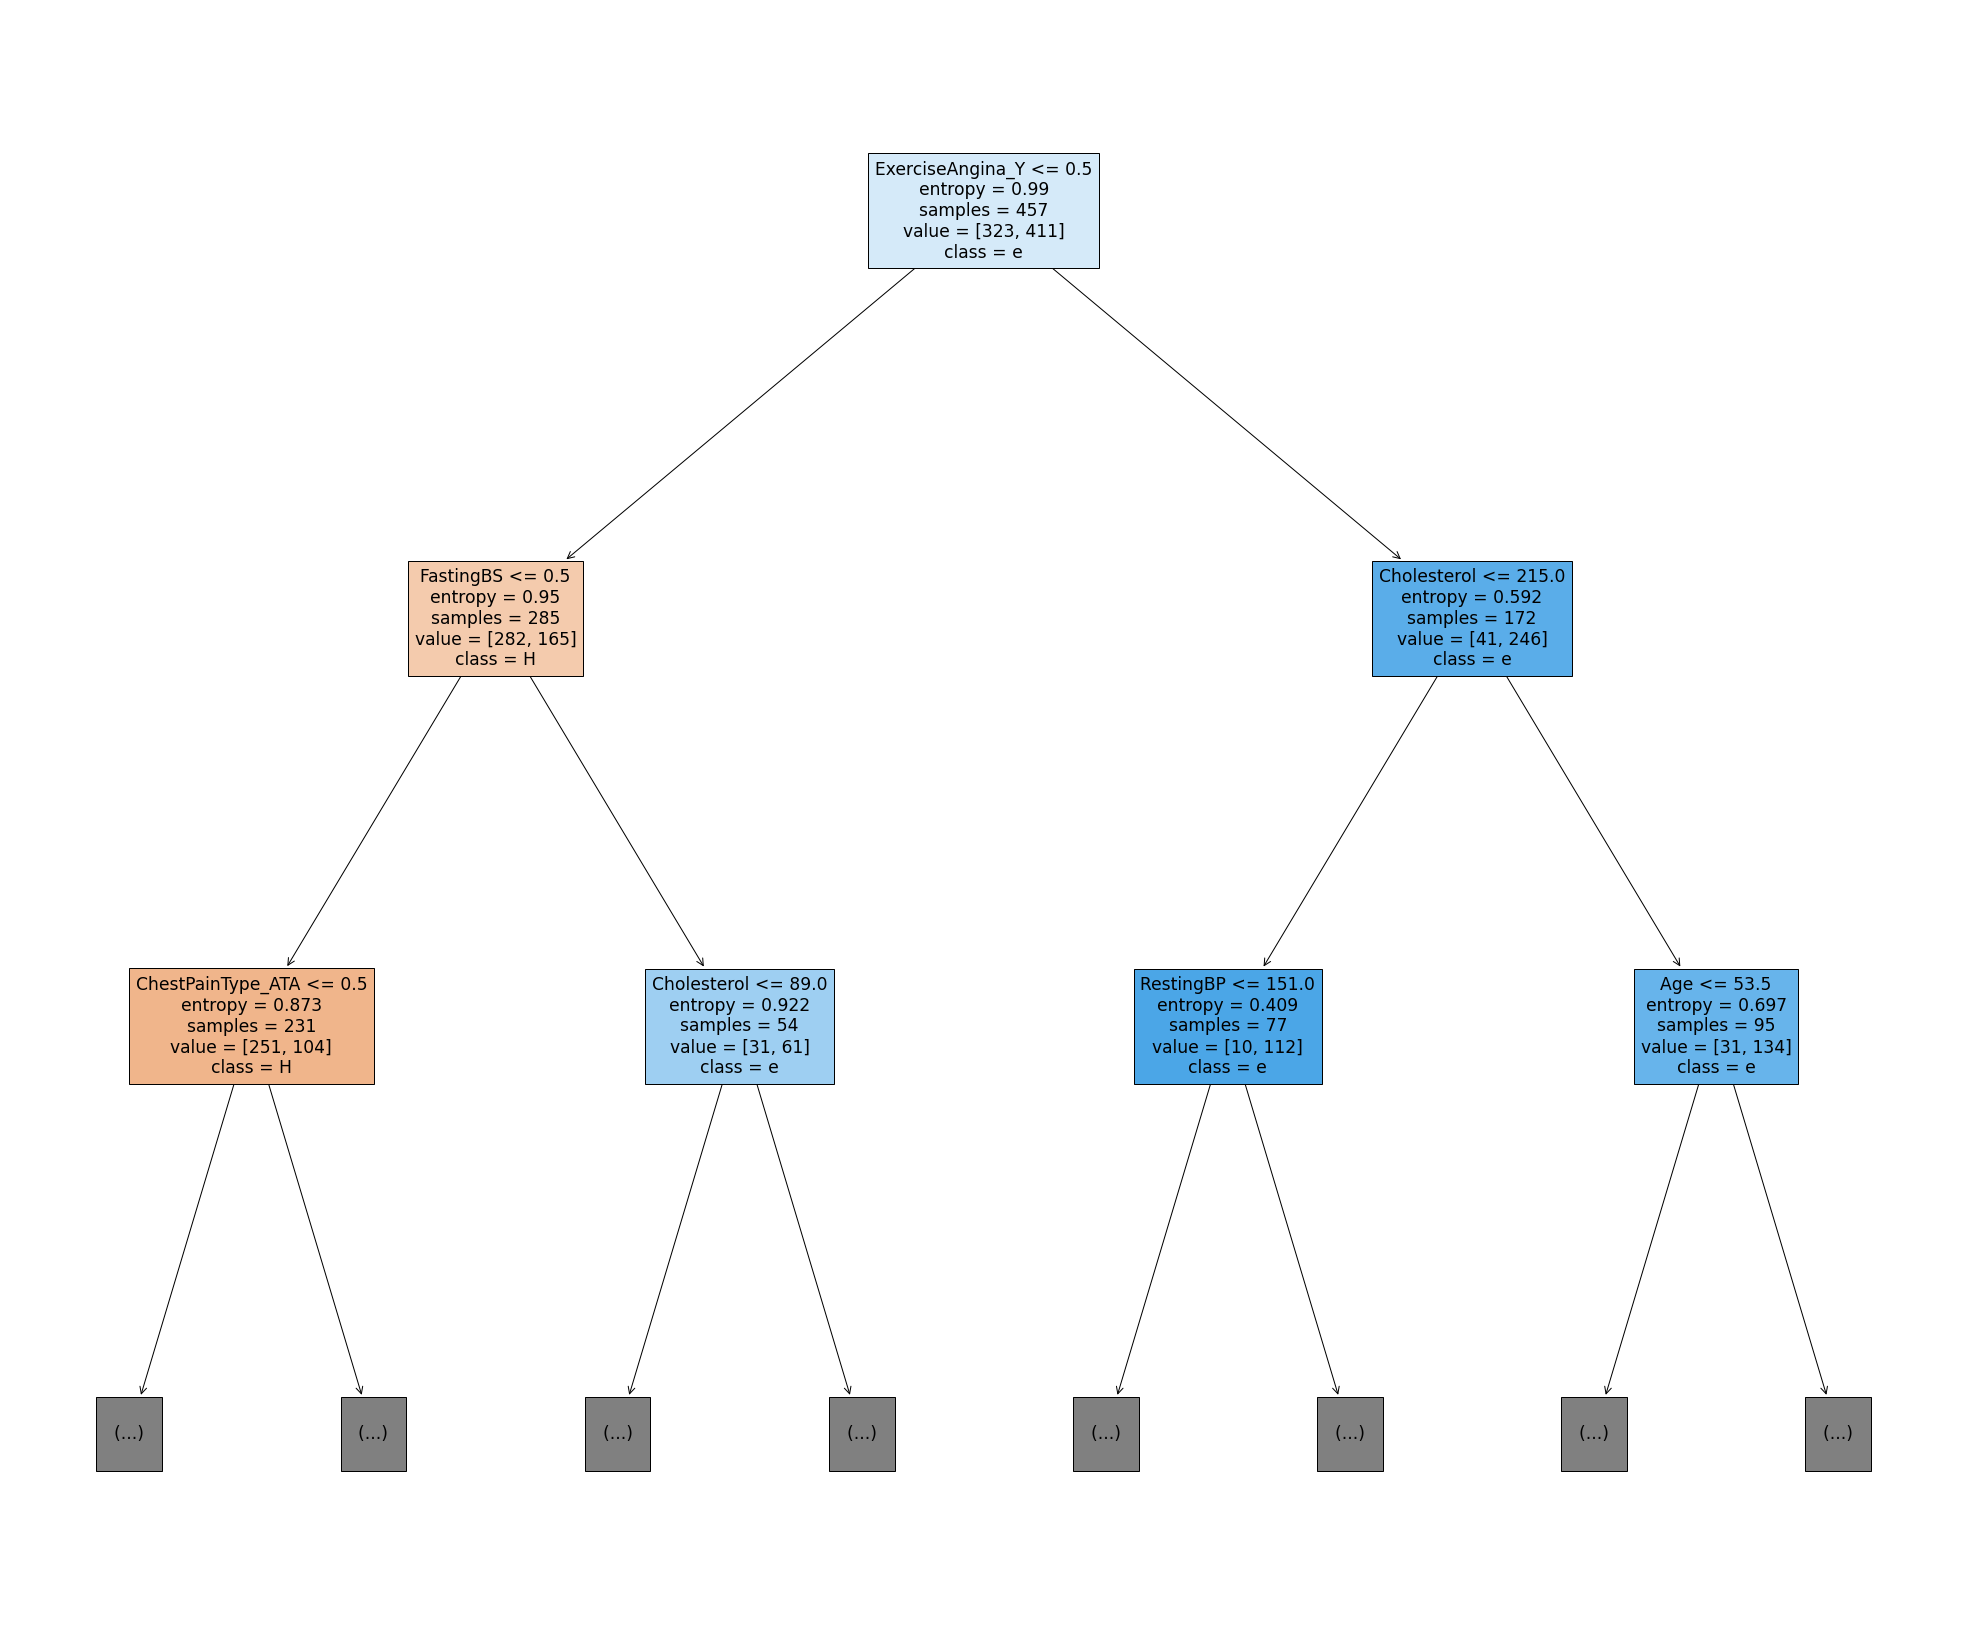

In [31]:
#Extract single tree
estimator = model_rf.estimators_[5]

fig = plt.figure(figsize=(35,30))
DTree = tree.plot_tree(estimator, 
                feature_names = x_train.columns,
                class_names = 'HeartDisease',
                filled=True,
                max_depth = 2)